In [1]:
# !pip3 install soundata

  Using cached soundata-0.1.2-py3-none-any.whl (5.9 MB)
  Using cached librosa-0.10.0.post2-py3-none-any.whl (253 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 4.8 MB/s eta 0:00:0000:0100:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [303 lines of output]
      Running from numpy source directory.
      setup.py:485: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
        run_build = parse_setuppy_commands()
      Cythonizing sources
      Processing numpy/random/_bounded_integers.pxd.in
      Processing numpy/random/_philox.pyx
      Processing numpy/random/_bounded_integers.pyx.in
      Processing numpy/random/_sfc64.pyx
      Processing numpy/random/_mt19937.pyx
      Processing numpy

In [4]:
import soundata
dataset = soundata.initialize('urbansound8k')
# dataset.download(force_overwrite=True)  # download the dataset
# dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip)  # see the available data

INFO: Downloading ['all'] to /Users/swimmingcircle/sound_datasets/urbansound8k
INFO: [all] downloading UrbanSound8K.tar.gz
5.61GB [39:11, 2.56MB/s]                                
100%|██████████| 8732/8732 [00:26<00:00, 331.39it/s]
INFO: Success: the dataset is complete and all files are valid.
INFO: --------------------


Clip(
  audio_path="/Users/swimmingcircle/sound_datasets/urbansound8k/audio/fold6/166931-4-1-6.wav",
  clip_id="166931-4-1-6",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesou

In [40]:
import pandas as pd
from pathlib import Path

download_path = Path.cwd()/'UrbanSound8K'

# Read metadata file
metadata_file = download_path/'metadata'/'UrbanSound8K.csv'
df = pd.read_csv(metadata_file)
df.head()

# Construct file path by concatenating fold and file name
df['relative_path'] = '/fold' + df['fold'].astype(str) + '/' + df['slice_file_name'].astype(str)

# Take relevant columns
df = df[['relative_path', 'classID']]
df.head()

,relative_path,classID
0,/fold5/100032-3-0-0.wav,3
1,/fold5/100263-2-0-117.wav,2
2,/fold5/100263-2-0-121.wav,2
3,/fold5/100263-2-0-126.wav,2
4,/fold5/100263-2-0-137.wav,2


In [41]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio



In [78]:
path= '/Users/swimmingcircle/Code/Deep-Learning-Tutorial/urbansound8k/audio/fold5/100032-3-0-0.wav'

In [34]:
# !pip3 install --upgrade librosa

In [47]:
import librosa

# Load the audio file
# AUDIO_FILE = './audio.wav'
samples, sample_rate = librosa.load(path, sr=None)
print(sample_rate, samples)

44100 [-0.00454712 -0.00483704 -0.00460815 ... -0.00065613 -0.00048828
  0.        ]


In [43]:
# from scipy.io import wavfile
# sample_rate, samples = wavfile.read(path)

# print(sample_rate, samples)

44100 [[-150 -148]
 [-160 -157]
 [-151 -151]
 ...
 [ -19  -24]
 [ -14  -18]
 [   1   -1]]


In [35]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample 
# number on the x-axis instead of seconds
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

44100 [[-150 -148]
 [-160 -157]
 [-151 -151]
 ...
 [ -19  -24]
 [ -14  -18]
 [   1   -1]]


AttributeError: module 'librosa.display' has no attribute 'waveplot'

<Figure size 1400x500 with 0 Axes>

In [ ]:
import librosa
audio = 'training\\00003.wav'
x, sr = librosa.load(audio)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

In [36]:
from IPython.display import Audio
Audio(path)

In [49]:
print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22420])

Example shape  (14004,) Sample rate  44100 Data type <class 'numpy.ndarray'>
[]


## Spectrograms

Frequency (y-axis) vs Time (x-axis)

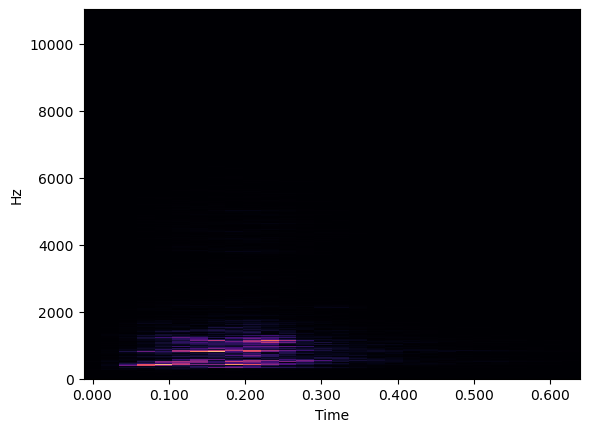

In [55]:
sgram = librosa.stft(samples) #stft: short-time Fourier transform (STFT)
librosa.display.specshow(sgram, x_axis='time', y_axis='fft')

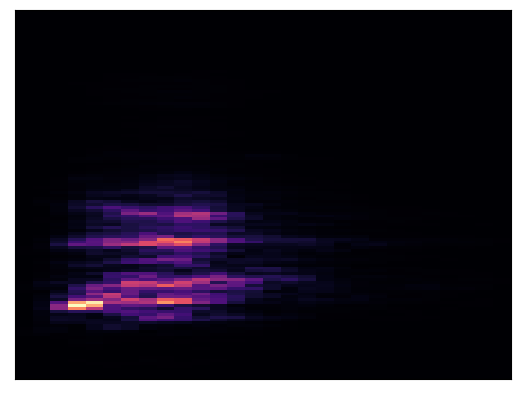

In [51]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram) # magnitude and phase
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate) 
librosa.display.specshow(mel_scale_sgram) 

## Mel Spectrograms


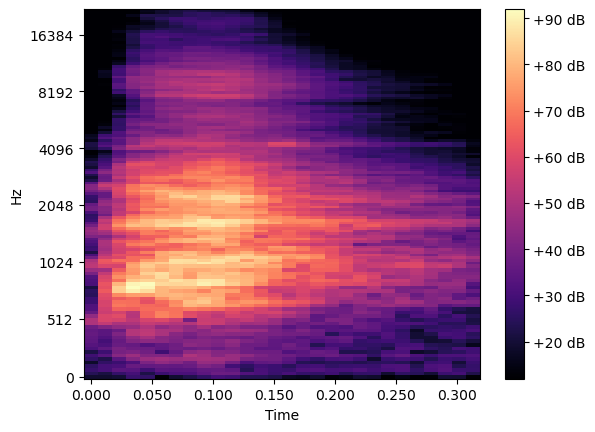

In [53]:
import numpy as np 

# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min) 
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

## MFCC

In [70]:
mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=20)  # MFCC

[Text(0.5, 1.0, 'MFCC')]

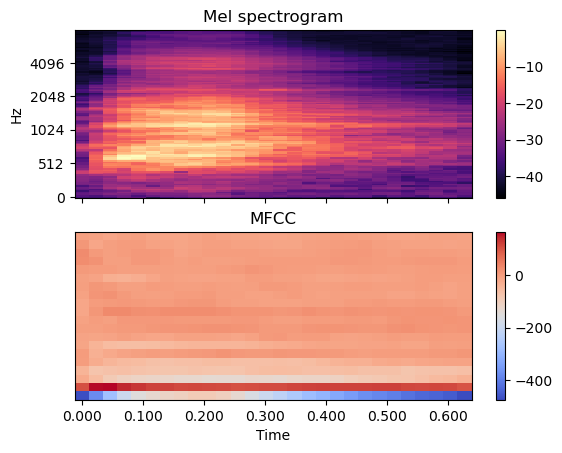

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(mel_scale_sgram, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

MFCC is of type <class 'numpy.ndarray'> with shape (20, 28)


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_13696/3253130411.py:6: FutureWarning: Pass y=[-0.00454712 -0.00483704 -0.00460815 ... -0.00065613 -0.00048828
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


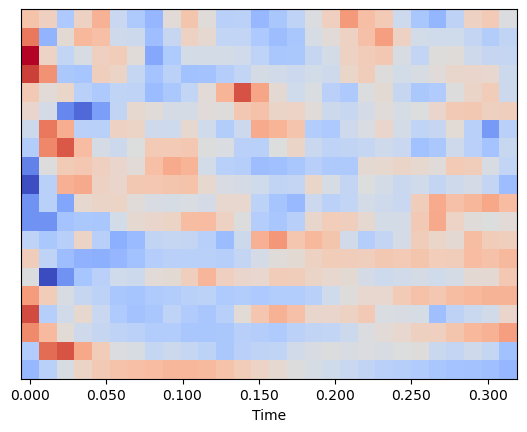

In [75]:
import sklearn
import librosa
import librosa.display


mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type <class 'numpy.ndarray'> with shape (20, 134)

The MFCC extracts a much smaller set of features from the audio that are the most relevant in capturing the essential quality of the sound.

In [82]:
class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)
# ----------------------------
  # Convert the given audio to the desired number of channels
  # ----------------------------
  @staticmethod
  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))

 # ----------------------------
  # Since Resample applies to a single channel, we resample one channel at a time
  # ----------------------------
  @staticmethod
  def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))    
# ----------------------------
  # Pad (or truncate) the signal to a fixed length 'max_ms' in milliseconds
  # ----------------------------
  @staticmethod
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)
      
    return (sig, sr)    

  # ----------------------------
  # Shifts the signal to the left or right by some percent. Values at the end
  # are 'wrapped around' to the start of the transformed signal.
  # ----------------------------
  @staticmethod
  def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)    

  # ----------------------------
  # Generate a Spectrogram
  # ----------------------------
  @staticmethod
  def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)    
  # ----------------------------
  # Augment the Spectrogram by masking out some sections of it in both the frequency
  # dimension (ie. horizontal bars) and the time dimension (vertical bars) to prevent
  # overfitting and to help the model generalise better. The masked sections are
  # replaced with the mean value.
  # ----------------------------
  @staticmethod
  def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = spec

    freq_mask_param = max_mask_pct * n_mels
    for _ in range(n_freq_masks):
      aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

    time_mask_param = max_mask_pct * n_steps
    for _ in range(n_time_masks):
      aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)

    return aug_spec    

In [92]:
audio_obj = AudioUtil()
audio_obj.open(path)

audio_obj.rechannel(audio_obj.open(path), 2)
audio_obj.resample(audio_obj.open(path), 8000)
audio_obj.pad_trunc(audio_obj.open(path), 1000)
audio_obj.time_shift(audio_obj.open(path), 0.2)
audio_obj.spectro_gram(audio_obj.open(path))
audio_obj.spectro_augment(audio_obj.spectro_gram(audio_obj.open(path)))


tensor([[[-25.0505, -41.2511, -36.1329,  ..., -31.0769, -28.6918, -33.8472],
         [-23.6376, -27.8626, -24.8301,  ..., -23.2894, -27.6495, -30.2473],
         [-26.3361, -24.3573, -25.9767,  ..., -23.5510, -34.7884, -25.0736],
         ...,
         [ -9.6471,  -9.6471,  -9.6471,  ...,  -9.6471,  -9.6471,  -9.6471],
         [ -9.6471,  -9.6471,  -9.6471,  ...,  -9.6471,  -9.6471,  -9.6471],
         [-33.1183, -32.9874, -32.4816,  ..., -33.5740, -32.5449, -34.0000]],

        [[-25.5122, -40.4723, -35.9413,  ..., -30.9908, -28.8404, -32.2273],
         [-24.2168, -29.3963, -24.6012,  ..., -23.2614, -28.2164, -29.8071],
         [-26.5966, -25.1715, -25.4511,  ..., -23.3287, -35.6447, -25.4243],
         ...,
         [ -9.6471,  -9.6471,  -9.6471,  ...,  -9.6471,  -9.6471,  -9.6471],
         [ -9.6471,  -9.6471,  -9.6471,  ...,  -9.6471,  -9.6471,  -9.6471],
         [-33.1311, -33.0167, -32.5667,  ..., -33.3966, -32.5846, -33.7529]]])

In [83]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

# ----------------------------
# Sound Dataset
# ----------------------------
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 4000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4
            
  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)    
    
  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.data_path + self.df.loc[idx, 'relative_path']
    # Get the Class ID
    class_id = self.df.loc[idx, 'classID']

    aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same 
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    reaud = AudioUtil.resample(aud, self.sr)
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
    shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

    return aug_sgram, class_id


In [95]:
from torch.utils.data import random_split

myds = SoundDS(df, download_path)

# Random split of 80:20 between training and validation
num_items = len(myds)
num_train = round(num_items * 0.8)
num_val = num_items - num_train
train_ds, val_ds = random_split(myds, [num_train, num_val])

# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=False)